In [1]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import sympy as sp
from sympy.utilities.lambdify import lambdify
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib.ticker import LogLocator

In [31]:
df = pd.read_csv('data/data.csv',dtype=np.float64)
df.columns

Index(['Time', 'Speed Sensor2:Speed', 'Angle Sensor:Angle',
       'EBike Motor:Back EMF:1', 'EBike Motor:Back EMF:2',
       'EBike Motor:Back EMF:3', 'Hall Sensor:1', 'Hall Sensor:2',
       'Hall Sensor:3'],
      dtype='object')

In [32]:
speed = df['Speed Sensor2:Speed']
radsec2rpm = 30/np.pi

speed = $f_r/PP \cdot 2 \pi$

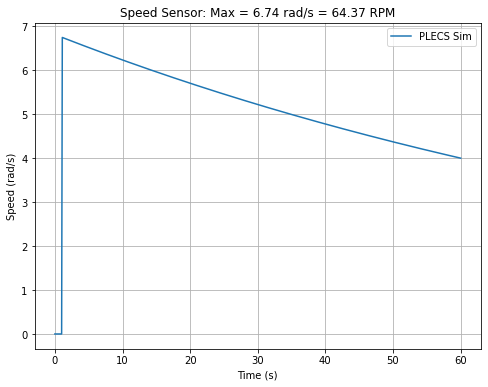

In [42]:
fig,ax = plt.subplots(figsize=(8,6))
ax.set_title(f'Speed Sensor: Max = {round(max(speed),2)} rad/s = {round(max(speed)*radsec2rpm,2)} RPM')
ax.plot(df['Time'],speed,label='PLECS Sim')
ax.set(ylabel=r'Speed (rad/s)',xlabel='Time (s)')
ax.grid(True)
ax.legend()
plt.show();

In [52]:
backEMF= df[(df['Time']>1)&(df['Time']<1.5)]
maxEMF = round(max(df['EBike Motor:Back EMF:1']),2)

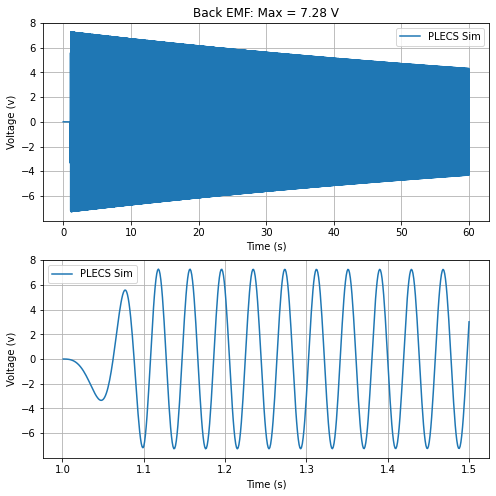

In [56]:
fig,ax = plt.subplots(2,1, figsize=(8,8))

ax[0].set_title(f'Back EMF: Max = {maxEMF} V')
ax[0].plot(df['Time'],df['EBike Motor:Back EMF:1'],label='PLECS Sim')
ax[0].set(ylabel=r'Voltage (v)',xlabel='Time (s)')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(backEMF['Time'],backEMF['EBike Motor:Back EMF:1'],label='PLECS Sim')
ax[1].set(ylabel=r'Voltage (v)',xlabel='Time (s)')
#ax[1].set_title(f'Speed Sensor: Max = {round(max(speed),2)} rad/s = {round(max(speed)*radsec2rpm,2)} RPM')
ax[1].grid(True)
ax[1].legend()
plt.show();

In [58]:
hall = df[(df['Time']>1.15)&(df['Time']<1.2)]
hall1 = hall['Hall Sensor:1']
hall2 = hall['Hall Sensor:2']
hall3 = hall['Hall Sensor:3']

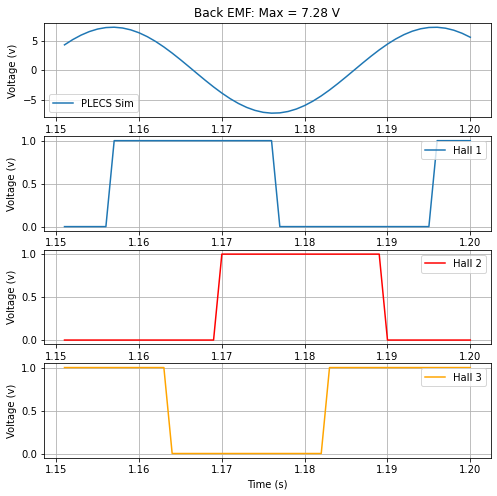

In [63]:
fig,ax = plt.subplots(4,1, figsize=(8,8))

ax[0].set_title(f'Back EMF: Max = {maxEMF} V')
ax[0].plot(hall['Time'],hall['EBike Motor:Back EMF:1'],label='PLECS Sim')
ax[0].set(ylabel=r'Voltage (v)',xlabel='Time (s)')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(hall['Time'],hall1,label='Hall 1')
ax[1].set(ylabel=r'Voltage (v)',xlabel='Time (s)')
ax[1].grid(True)
ax[1].legend()

ax[2].plot(hall['Time'],hall2,label='Hall 2',color='red')
ax[2].set(ylabel=r'Voltage (v)',xlabel='Time (s)')
ax[2].grid(True)
ax[2].legend()

ax[3].plot(hall['Time'],hall3,label='Hall 3',color='orange')
ax[3].set(ylabel=r'Voltage (v)',xlabel='Time (s)')
ax[3].grid(True)
ax[3].legend()
plt.show();